In [1]:
orf_list = [10, 300, 450, 678, 1020, 2001, 2010, 2030, 2300, 3000]

file_string = ""

file1 = open("coordinates.txt", "w")
for i in range(0, len(orf_list), 2):
    file_string += str(orf_list[i])
    file_string += ","
    file_string += str(orf_list[i+1])
    file_string += "\n"
    
file_string = file_string.rstrip()

print(file_string)

file1.write(file_string)

file1.close()

10,300
450,678
1020,2001
2010,2030
2300,3000


In [2]:
file2 = open("output.gff", "w")

file_string2 = ""
line = ""

gene_num = 1

for i in range(0, len(orf_list), 2):
    begin = str(orf_list[i])
    end = str(orf_list[i+1])
    gene_name = "ORF" + str(gene_num) 
    line += "unknown" + "\t" + gene_name + "\t" + "gene" + "\t" + str(begin) + "\t" + str(end) + "\t" + "-" + "\t" + "+" + "\t" + "-" + "\t" + "ID" + "\n"
    file_string2 += line
    line = ""
    gene_num += 1

file2.write(file_string2)
file2.close()

print(file_string2)

unknown	ORF1	gene	10	300	-	+	-	ID
unknown	ORF2	gene	450	678	-	+	-	ID
unknown	ORF3	gene	1020	2001	-	+	-	ID
unknown	ORF4	gene	2010	2030	-	+	-	ID
unknown	ORF5	gene	2300	3000	-	+	-	ID



In [3]:
from dna_features_viewer import BiopythonTranslator
graphic_record = BiopythonTranslator().translate_record("output.gff")
ax, _ = graphic_record.plot(figure_width=20)
ax.set_title("Unknown ORF predictions", fontweight="bold", fontsize=16)
ax.figure.savefig("map.jpeg")

ModuleNotFoundError: No module named 'dna_features_viewer'

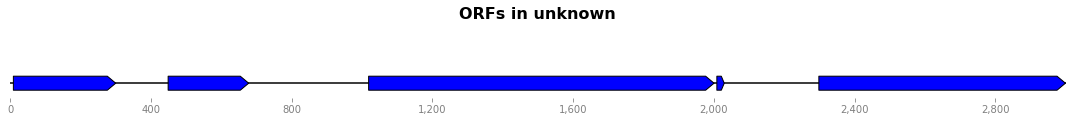

In [ ]:
from dna_features_viewer import BiopythonTranslator

def features_properties(f):
    """Features get a  color."""
    label = None
    color = {
        "Mutant": "firebrick",
        "Active site": "yellow",
        "Beta strand": "lightyellow",
        "Chain": "lightcyan",
        "Helix": "honeydew",
        "Initiator methionine": "white",
        "Metal binding": "lightsteelblue",
        "Turn": "moccasin",
    }.get(f.type, "blue")
    return dict(color=color, label=label)

translator = BiopythonTranslator(features_properties=features_properties)
graphic_record = translator.translate_record("output.gff")
ax, _ = graphic_record.plot(
    figure_width=15, max_label_length=100, elevate_outline_annotations=True,
)
ax.set_title("ORFs in unknown", fontweight="bold", fontsize=16)
ax.figure.tight_layout()
ax.figure.savefig("orf_map2.png", bbox_inches="tight")